## _*NaH dissociation curve using VQE with UCCSD*_

This notebook demonstrates using the Qiskit Chemistry to plot graphs of the ground state energy of the Sodium Hydride (NaH) molecule over a range of inter-atomic distances using VQE and UCCSD. It is compared to the same energies as computed by the ExactEigensolver.

This notebook populates a dictionary, that is a progammatic representation of an input file, in order to drive the Qiskit Chemistry stack. Such a dictionary can be manipulated programmatically and this is indeed the case here where we alter the molecule supplied to the driver in each loop.

_*Note: this molecule is larger than the similar LiH and this notebook can take a while to run.*_

This notebook has been written to use the PYSCF chemistry driver.

In [1]:
import numpy as np
import pylab
import copy
from qiskit.chemistry import QiskitChemistry

# Input dictionary to configure Qiskit Chemistry for the chemistry problem.
qiskit_chemistry_dict = {
    'driver': {'name': 'PYSCF'},
    'PYSCF': {'atom': '', 'basis': 'sto3g'},
    'operator': {'name': 'hamiltonian', 'qubit_mapping': 'parity',
                 'two_qubit_reduction': True, 'freeze_core': True, 'orbital_reduction': []},
    'algorithm': {'name': ''},
    'optimizer': {'name': 'SLSQP', 'maxiter': 2500 },
    'variational_form': {'name': 'UCCSD'},
    'initial_state': {'name': 'HartreeFock'}
}
molecule = 'H .0 .0 -{0}; Na .0 .0 {0}'
algorithms = ['VQE', 'ExactEigensolver']

pts  = [x * 0.1  for x in range(10, 25)]
pts += [x * 0.25 for x in range(10, 18)]
pts += [4.5]
energies = np.empty([len(algorithms), len(pts)])
hf_energies = np.empty(len(pts))
distances = np.empty(len(pts))
dipoles     = np.empty([len(algorithms), len(pts)])
eval_counts = np.empty(len(pts))

print('Processing step __', end='')
for i, d in enumerate(pts):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    qiskit_chemistry_dict['PYSCF']['atom'] = molecule.format(d/2) 
    for j in range(len(algorithms)):
        dict = copy.deepcopy(qiskit_chemistry_dict)
        dict['algorithm']['name'] = algorithms[j] 
        if algorithms[j] == 'ExactEigensolver':
            del dict['optimizer']
            del dict['variational_form']
            del dict['initial_state']
        solver = QiskitChemistry()
        result = solver.run(dict)
        energies[j][i] = result['energy']
        hf_energies[i] = result['hf_energy']
        dipoles[j][i]  = result['total_dipole_moment'] / 0.393430307
        if algorithms[j] == 'VQE':
            eval_counts[i] = result['algorithm_retvals']['eval_count']
    distances[i] = d
print(' --- complete')

print('Distances: ', distances)
print('Energies:', energies)
print('Hartree-Fock energies:', hf_energies)
print('Dipoles:', dipoles)
print('VQE num evaluations:', eval_counts)


Processing step 23 --- complete
Distances:  [1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3
 2.4  2.5  2.75 3.   3.25 3.5  3.75 4.   4.25 4.5 ]
Energies: [[-160.05849063 -160.15699836 -160.22568735 -160.27202139 -160.30172252
  -160.31895083 -160.32675432 -160.32741528 -160.32269878 -160.31400273
  -160.30245852 -160.28899051 -160.27435538 -160.2591661  -160.2439109
  -160.2289718  -160.19475711 -160.16708758 -160.14746338 -160.13627128
  -160.13114984 -160.12788151 -160.12587996 -160.06078205]
 [-160.05849084 -160.15699856 -160.22568741 -160.2720216  -160.30172261
  -160.31895199 -160.32675458 -160.32741545 -160.32269886 -160.31400297
  -160.30245861 -160.28899063 -160.27435552 -160.25916618 -160.24391112
  -160.22897222 -160.19475719 -160.16708762 -160.14746354 -160.13627173
  -160.13150727 -160.12988489 -160.12941537 -160.12738873]]
Hartree-Fock energies: [-160.04320295 -160.14360744 -160.21336733 -160.26022033 -160.29007462
 -160.30721237 -160.31476208 -160.31

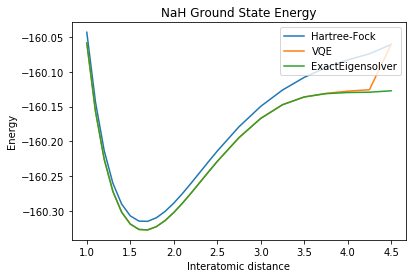

In [2]:
pylab.plot(distances, hf_energies, label='Hartree-Fock')
for j in range(len(algorithms)):
    pylab.plot(distances, energies[j], label=algorithms[j])
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('NaH Ground State Energy')
pylab.legend(loc='upper right');

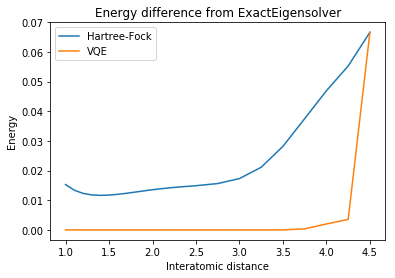

In [3]:
pylab.plot(distances, np.subtract(hf_energies, energies[1]), label='Hartree-Fock')
pylab.plot(distances, np.subtract(energies[0], energies[1]), label='VQE')
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('Energy difference from ExactEigensolver')
pylab.legend(loc='upper left');

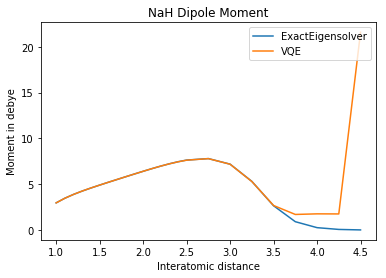

In [4]:
for j in reversed(range(len(algorithms))):
    pylab.plot(distances, dipoles[j], label=algorithms[j])
pylab.xlabel('Interatomic distance')
pylab.ylabel('Moment in debye')
pylab.title('NaH Dipole Moment')
pylab.legend(loc='upper right');

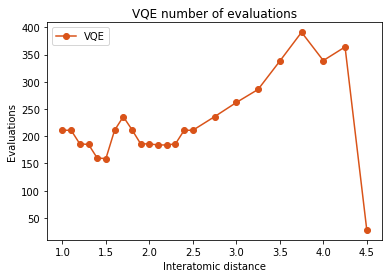

In [5]:
pylab.plot(distances, eval_counts, '-o', color=[0.8500, 0.3250, 0.0980], label='VQE')
pylab.xlabel('Interatomic distance')
pylab.ylabel('Evaluations')
pylab.title('VQE number of evaluations')
pylab.legend(loc='upper left');